
# Project: Investigate a Dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
Certain columns, like ‘cast’ and ‘genres’,
1. contain multiple values separated by pipe (|) characters.
2. There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
3. The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

> **Questions**: 
> 1. Which genres are more popular and profitable
> 2. Which company make the most profit
> 3. What keywords are the most popular
> 4. Which movies are the most popular or profitable
> 5. The correlation between features



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("talk")

<a id='wrangling'></a>
## Data Wrangling

### General Properties

#### read data

In [2]:
data = pd.read_csv('tmdb-movies.csv')
data.shape

(10866, 21)

In [3]:
data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### check if there is na value

In [4]:
data.isna().any()

id                      False
imdb_id                  True
popularity              False
budget                  False
revenue                 False
original_title          False
cast                     True
homepage                 True
director                 True
tagline                  True
keywords                 True
overview                 True
runtime                 False
genres                   True
production_companies     True
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

In [5]:
data.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
len(data.production_companies.unique())

7446


### Data Cleaning (drop columns with large number of NaNs and non relevant columns. drop rows with NaN)

#### drop columns: 'homepage', 'overview', 'release_date', 'budget','revenue', 'imdb_id'(Non relevant);  'tagline', 'homepage'(Too many NaNs)

In [8]:
data_drop_columns = data.drop(['homepage', 'tagline', 'homepage', 'overview', 'release_date', 'budget','revenue', 'imdb_id'], axis=1)

In [9]:
data_drop_columns.head()

,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


In [10]:
data_drop_columns.isna().sum()

id                         0
popularity                 0
original_title             0
cast                      76
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

#### drop rows with na values

In [11]:
data_cleaned = data_drop_columns.dropna()

In [12]:
data_cleaned.shape

(8667, 14)

In [13]:
data_cleaned.head()

,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


In [108]:
data_cleaned.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8.667000e+03,8.667000e+03
mean,57001.470520,0.741920,103.813776,264.187031,6.003496,2000.130957,2.130849e+07,6.361717e+07
std,86237.736398,1.087596,26.205981,635.161318,0.893552,13.220940,3.710067e+07,1.592796e+08
min,5.000000,0.000188,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,9817.500000,0.250007,91.000000,20.000000,5.500000,1993.000000,0.000000e+00,0.000000e+00
50%,16219.000000,0.449397,100.000000,54.000000,6.100000,2004.000000,2.139935e+06,1.905315e+05
75%,54002.000000,0.842818,113.000000,200.000000,6.600000,2011.000000,2.811797e+07,5.521258e+07
max,417859.000000,32.985763,705.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Which genres are more popular and profitable)

#### split the genres which a movie belong to from combined value into single genre value 

In [19]:
genres_per_id = data_cleaned.genres.apply(lambda x: pd.value_counts(x.split('|'))).fillna(0)

In [21]:
genres_per_id.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#### count the number of each genre

In [104]:
genre_count = genres_per_id.sum(axis = 0)

In [15]:
genre_count_df = pd.DataFrame(genre_count, columns=[ 'count'])
genre_count_df['genre'] = genre_count_df.index
genre_count_df

,count,genre
Action,2023.0,Action
Adventure,1271.0,Adventure
Animation,512.0,Animation
Comedy,3050.0,Comedy
Crime,1201.0,Crime
Documentary,270.0,Documentary
Drama,3935.0,Drama
Family,946.0,Family
Fantasy,763.0,Fantasy
Foreign,90.0,Foreign


#### Plot the count of each genre

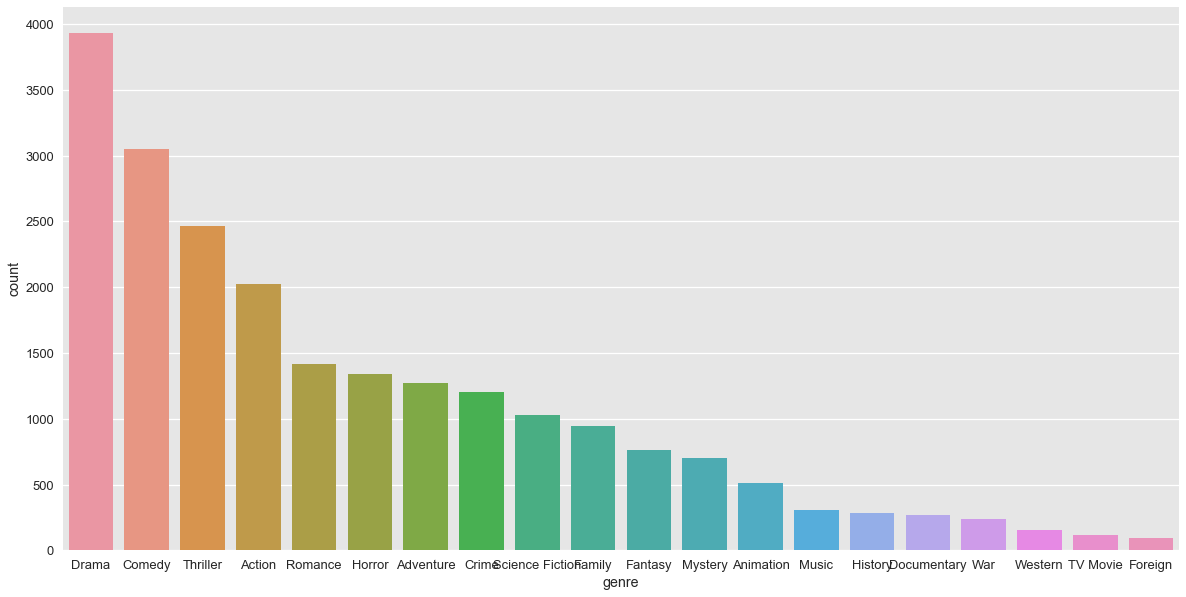

In [16]:
plt.figure(figsize=[20,10])
sns.barplot(data=genre_count_df.sort_values(by='count', ascending=False), x='genre', y='count')

Drame, Comedy, Thriller and Action are four most-made genres. The number of drama is the most.

In [17]:
data_cleaned.iloc[0]

id                                                                 135397
popularity                                                        32.9858
original_title                                             Jurassic World
cast                    Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
director                                                  Colin Trevorrow
keywords                monster|dna|tyrannosaurus rex|velociraptor|island
runtime                                                               124
genres                          Action|Adventure|Science Fiction|Thriller
production_companies    Universal Studios|Amblin Entertainment|Legenda...
vote_count                                                           5562
vote_average                                                          6.5
release_year                                                         2015
budget_adj                                                       1.38e+08
revenue_adj                           

#### calculate popularity of each genre

In [18]:
genres = list(genre_count_df.genre)

In [22]:
genre_popu_ma = np.matrix(data_cleaned.popularity) * np.matrix(genres_per_id)

In [23]:
genre_popu_list = genre_popu_ma.tolist()[0]

In [24]:
genre_popu = pd.DataFrame(
    {'genre': genres,
        'popularity': genre_popu_list})

In [25]:
genre_popu

,genre,popularity
0,Action,2086.134043
1,Adventure,1628.002247
2,Animation,521.461424
3,Comedy,2053.015220
4,Crime,952.377183
5,Documentary,60.778948
6,Drama,2588.755012
7,Family,870.439302
8,Fantasy,856.232009
9,Foreign,19.702684


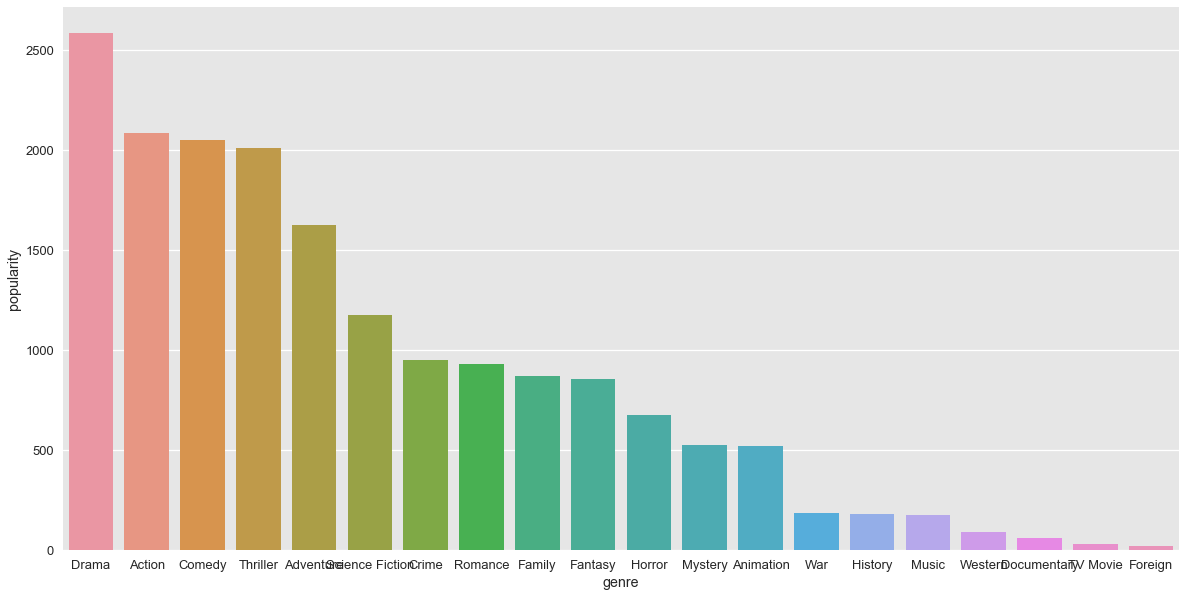

In [26]:
plt.figure(figsize=[20,10])
sns.barplot(data=genre_popu.sort_values(by='popularity', ascending=False), x='genre', y='popularity')

Drama is the most popular genre, following by action, comedy and thriller.

#### calculate revenue for each genre

In [28]:
genre_revenue_ma = np.matrix(data_cleaned.revenue_adj) * np.matrix(genres_per_id)
genre_revenue_list = genre_revenue_ma.tolist()[0]

In [29]:
genre_revenue = pd.DataFrame(
    {'genre': genres,
        'revenue': genre_revenue_list})

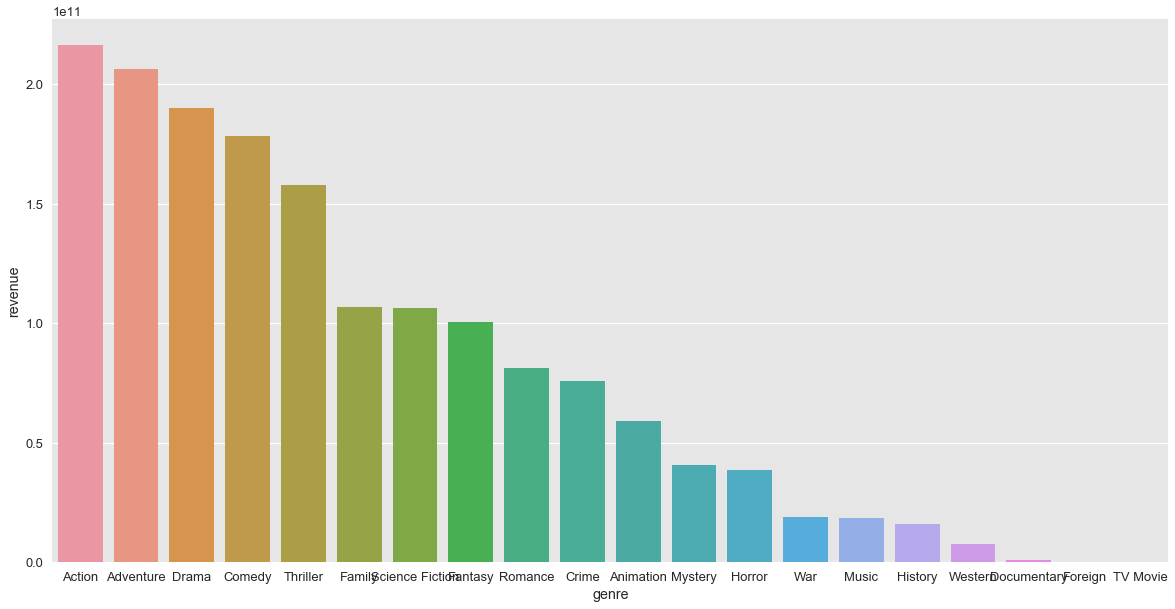

In [30]:
plt.figure(figsize=[20,10])
sns.barplot(data=genre_revenue.sort_values(by='revenue', ascending=False), x='genre', y='revenue')

Action, Adventure, Drama, Comedy and Thriller are the most profitable genres.

#### calculate ROI for each genre

In [31]:
genre_budget_ma = np.matrix(data_cleaned.budget_adj) * np.matrix(genres_per_id)

In [32]:
genre_roi_list = (genre_revenue_ma / genre_budget_ma).tolist()[0]
genre_roi = pd.DataFrame(
    {'genre': genres,
        'ROI': genre_roi_list})

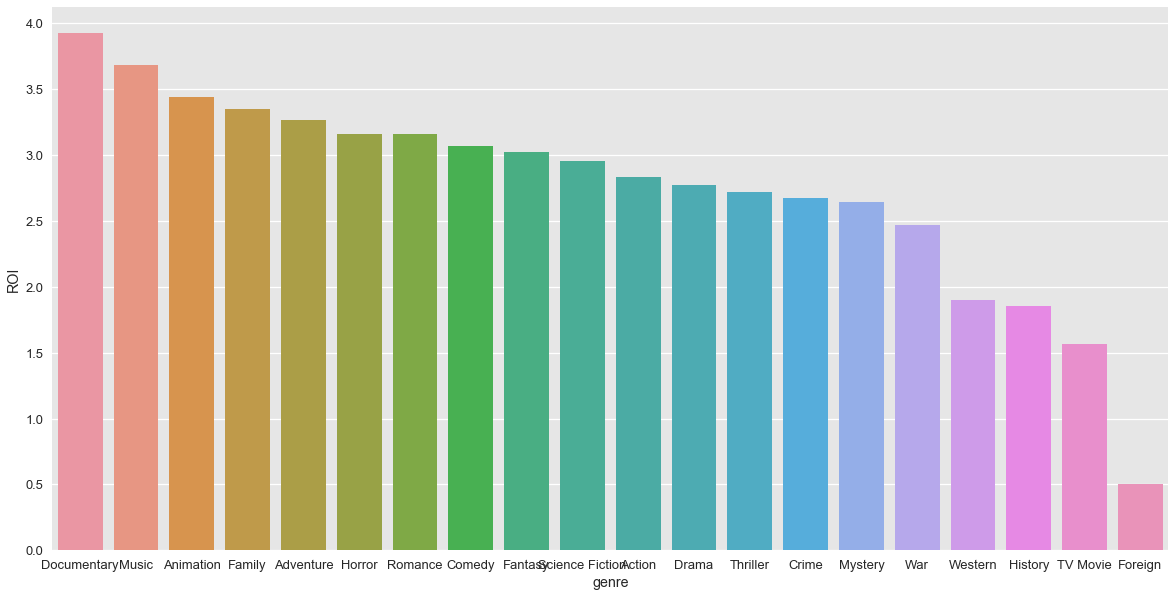

In [33]:
plt.figure(figsize=[20,10])
sns.barplot(data=genre_roi.sort_values(by='ROI', ascending=False), x='genre', y='ROI')

Documentary and Music have highest ROI with all others having fairly close ROI

### Research Question 2  (Which company make the most profit)

#### split the company from a combined value to single value

In [34]:
comp_per_id = data_cleaned.production_companies.apply(lambda x: pd.value_counts(x.split('|'))).fillna(0)

#### extract the companies which have over 50 movies

In [35]:
comp_over50 = comp_per_id.sum()[comp_per_id.sum()>50].index.tolist()

In [36]:
comp_per_id_over50 = comp_per_id[comp_over50]

In [37]:
comp_per_id_over50.shape

(8667, 34)

#### calculate the revenue for each company

In [38]:
comp_revenue_ma = np.matrix(data_cleaned.revenue_adj) * np.matrix(comp_per_id_over50)
comp_revenue_list = comp_revenue_ma.tolist()[0]

In [39]:
comp_revenue = pd.DataFrame(
    {'companies': comp_over50,
        'revenue': comp_revenue_list})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

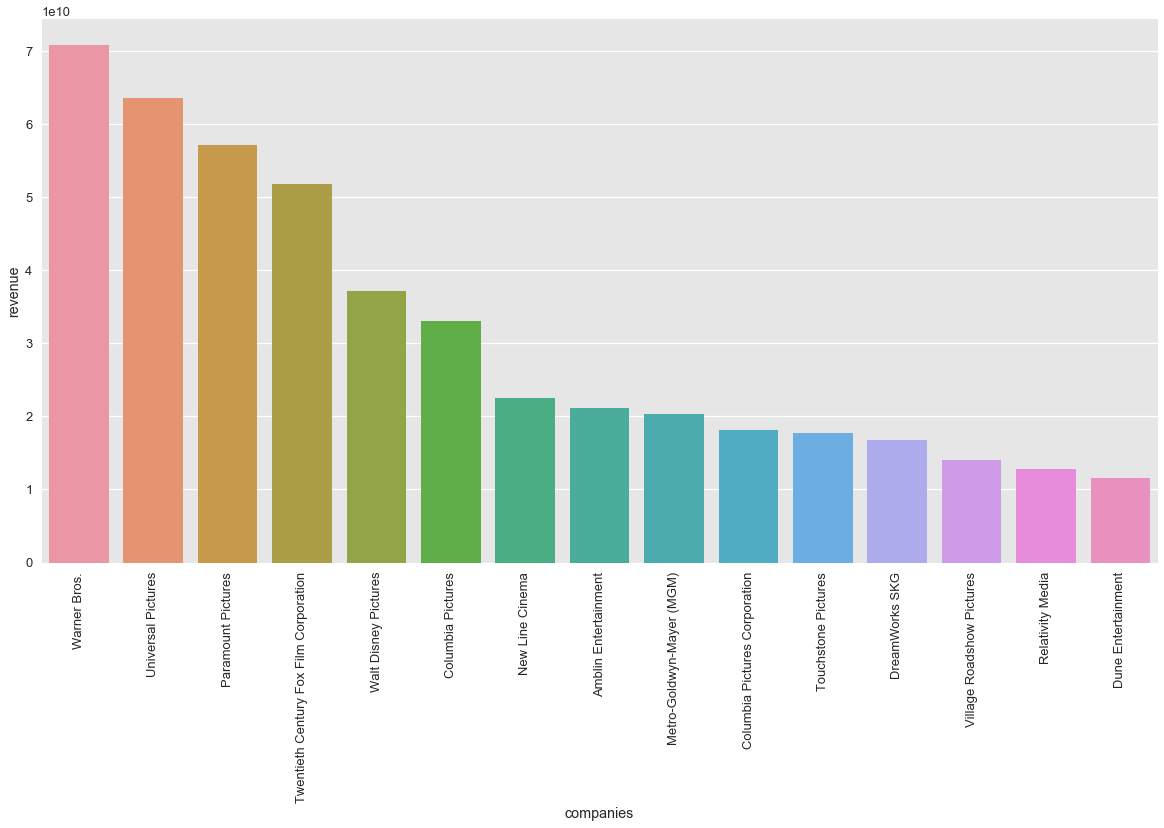

In [40]:
plt.figure(figsize=[20,10])
sns.barplot(data=comp_revenue.sort_values(by='revenue', ascending=False)[0:15], x='companies', y='revenue')
plt.xticks(rotation=90)

Warner Bros, Universal Pictures, Paramount Pictures and Twentieth Century Fox Film Coportion have highest revenue with Warner Bros highest

### Research Question 3 (What keywords are the most popular)

#### split the keywords from a combined value to single keyword value

In [41]:
keyword_per_id = data_cleaned.keywords.apply(lambda x: pd.value_counts(x.split('|'))).fillna(0)

#### extract keywords which have over 100 frequency

In [42]:
keyword_over100_count = pd.DataFrame(keyword_per_id.sum()[keyword_per_id.sum()>100], columns=[ 'count'])
keyword_over100_count['keyword'] = keyword_over100_count.index

In [70]:
keyword_over100 = keyword_per_id.sum()[keyword_per_id.sum()>100].index.tolist()
keyword_per_id_over100 = keyword_per_id[keyword_over100]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

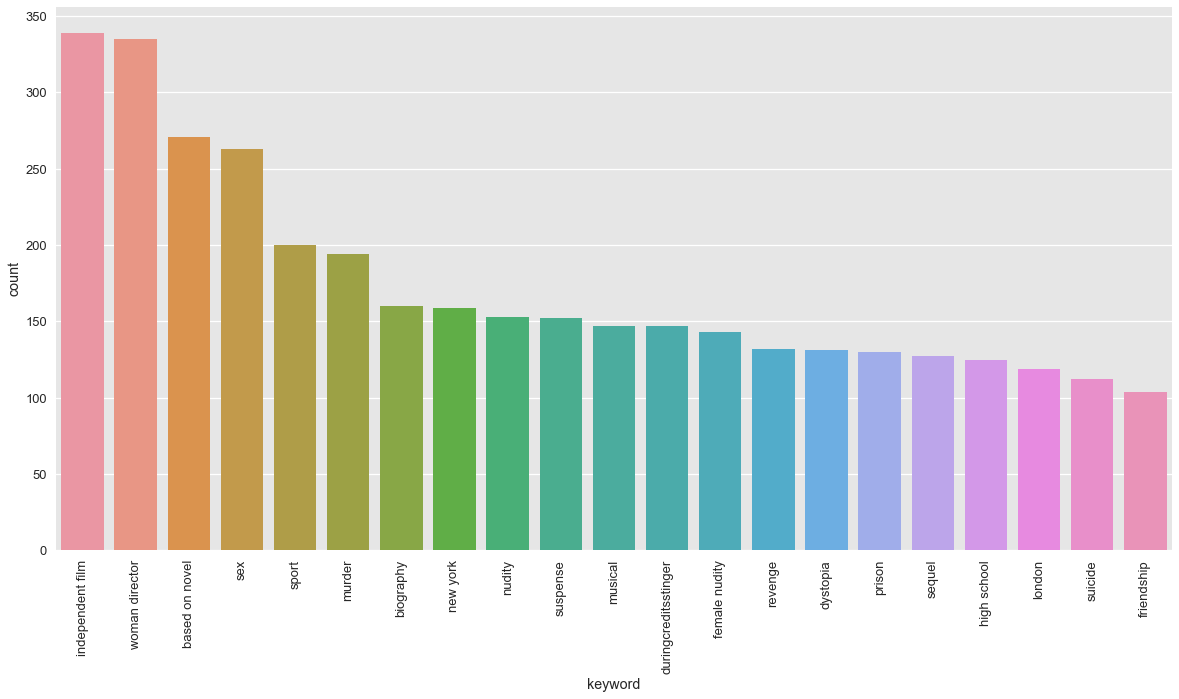

In [43]:
plt.figure(figsize=[20,10])
sns.barplot(data=keyword_over100_count.sort_values(by='count', ascending=False), x='keyword', y='count')
plt.xticks(rotation=90)

'independent film', 'woman director', 'based on novel' and 'sex' are the most popular key words

### Research Question 4 (Which movies are the most popular or profitable)

#### calculate movie popularity

In [44]:
movie_popu = data_cleaned[['original_title', 'popularity']]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

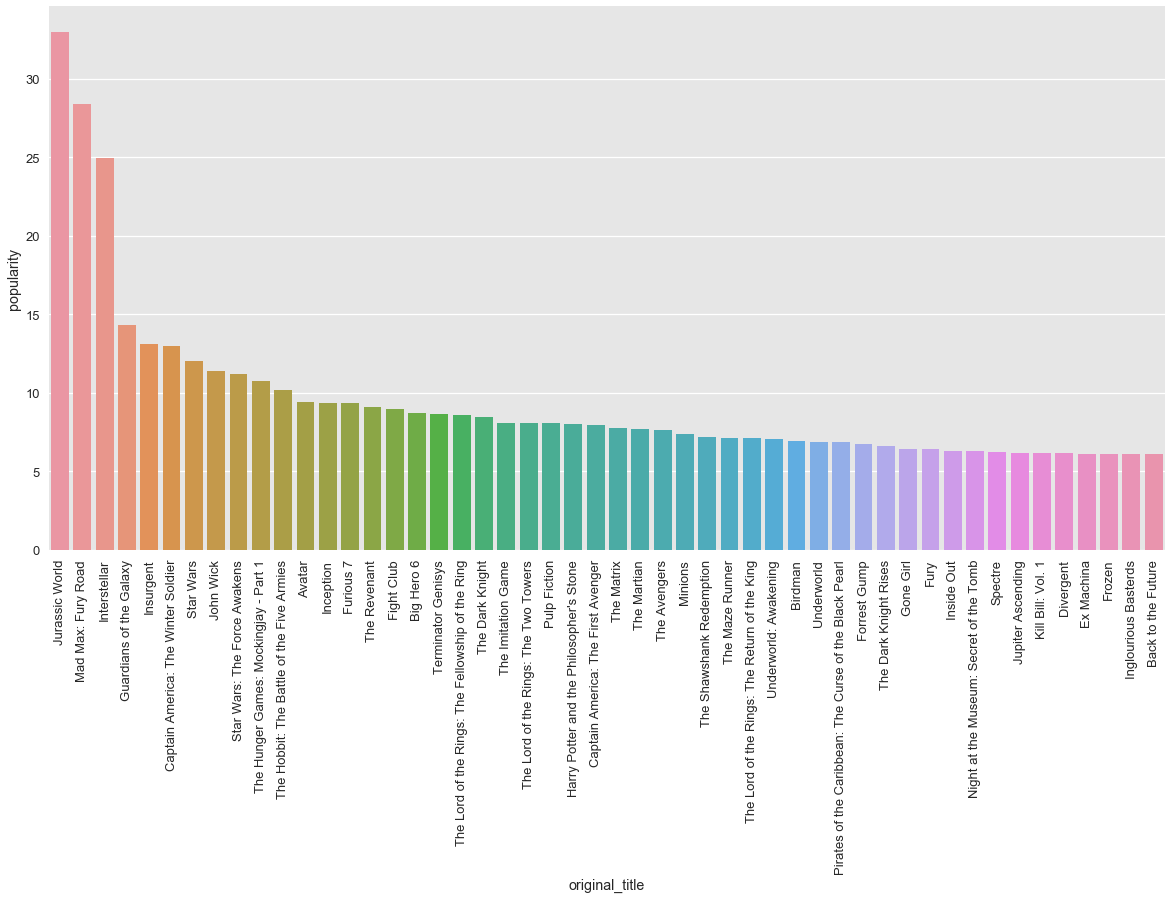

In [45]:
plt.figure(figsize=[20,10])
sns.barplot(data=movie_popu.sort_values(by='popularity', ascending=False)[0:50], x='original_title', y='popularity')
plt.xticks(rotation=90)

'Jurassic World', 'Mad Max: Fury Road', 'Interstellar' are the most popular movies and way more than others

#### list the top 3 popular movies

In [48]:
list(movie_popu.sort_values(by='popularity', ascending=False)[0:3].original_title)

['Jurassic World', 'Mad Max: Fury Road', 'Interstellar']

In [49]:
data_cleaned[data_cleaned.original_title=='Jurassic World']

,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09


In [50]:
data_cleaned[data_cleaned.original_title== 'Mad Max: Fury Road']

,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08


In [51]:
data_cleaned[data_cleaned.original_title== 'Interstellar']

,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
629,157336,24.949134,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,saving the world|artificial intelligence|fathe...,169,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,6498,8.0,2014,1.519800e+08,5.726906e+08


#### calculate movie revenue

In [52]:
movie_revenue = data_cleaned[['original_title', 'revenue_adj']]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

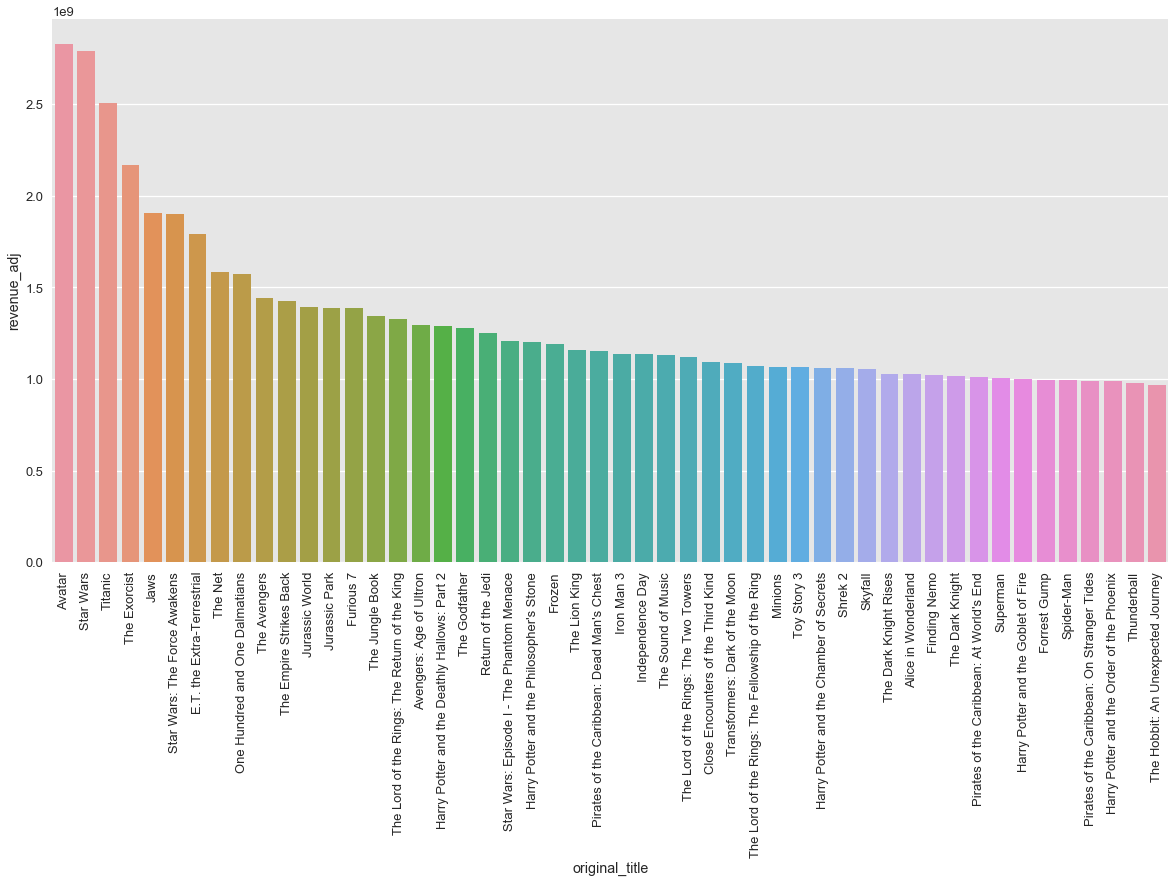

In [53]:
plt.figure(figsize=[20,10])
sns.barplot(data=movie_revenue.sort_values(by='revenue_adj', ascending=False)[0:50], x='original_title', y='revenue_adj')
plt.xticks(rotation=90)

'Avatar', 'Star Wars' and 'Titanic' produce the most revenue

In [54]:
data_cleaned[data_cleaned.original_title== 'Avatar']

,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,9.432768,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,8458,7.1,2009,2.408869e+08,2.827124e+09


In [55]:
data_cleaned[data_cleaned.original_title== 'Star Wars']

,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
1329,11,12.037933,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,android|galaxy|hermit|death star|lightsaber,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,4428,7.9,1977,3.957559e+07,2.789712e+09


In [56]:
data_cleaned[data_cleaned.original_title== 'Titanic']

,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
5231,597,4.355219,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,shipwreck|iceberg|ship|panic|titanic,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,4654,7.3,1997,2.716921e+08,2.506406e+09
8630,2699,0.219364,Titanic,Peter Gallagher|George C. Scott|Catherine Zeta...,Robert Lieberman,shipwreck|ship|titanic|ocean liner|disaster,173,Action|Drama|Romance,American Zoetrope,21,6.1,1996,1.807282e+07,0.000000e+00


#### calculate ROI for each movie

In [57]:
movie_roi = data_cleaned[['original_title', 'revenue_adj', 'budget_adj']]

In [58]:
movie_roi['ROI'] = list(movie_roi.revenue_adj.div(movie_roi.budget_adj))

C:\Users\42914\Anaconda2\envs\movie\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [59]:
movie_roi_cleaned = movie_roi[movie_roi.budget_adj!=0].dropna()

In [60]:
movie_roi_cleaned.sort_values(by='ROI', ascending=False)[0:50]

,original_title,revenue_adj,budget_adj,ROI
10495,"The Karate Kid, Part II",2.289886e+08,2.248029e+02,1.018619e+06
6179,Into the Night,1.358201e+07,2.310969e+02,5.877193e+04
3608,From Prada to Nada,2.423495e+06,9.015402e+01,2.688172e+04
7447,Paranormal Activity,2.033462e+08,1.577503e+04,1.289039e+04
2449,The Blair Witch Project,3.246451e+08,3.272632e+04,9.920000e+03
3581,"Love, Wedding, Marriage",1.335831e+03,9.693980e-01,1.378000e+03
1354,Eraserhead,2.518447e+07,3.597781e+04,7.000000e+02
7277,Pink Flamingos,3.128737e+07,6.257473e+04,5.000000e+02
7178,Super Size Me,3.298837e+07,7.503895e+04,4.396166e+02
242,The Gallows,3.925124e+07,9.199996e+04,4.266441e+02


'The Karate Kid, Part II' has so much higher ROI than others which is over 1.1 million

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text xticklabel objects>)

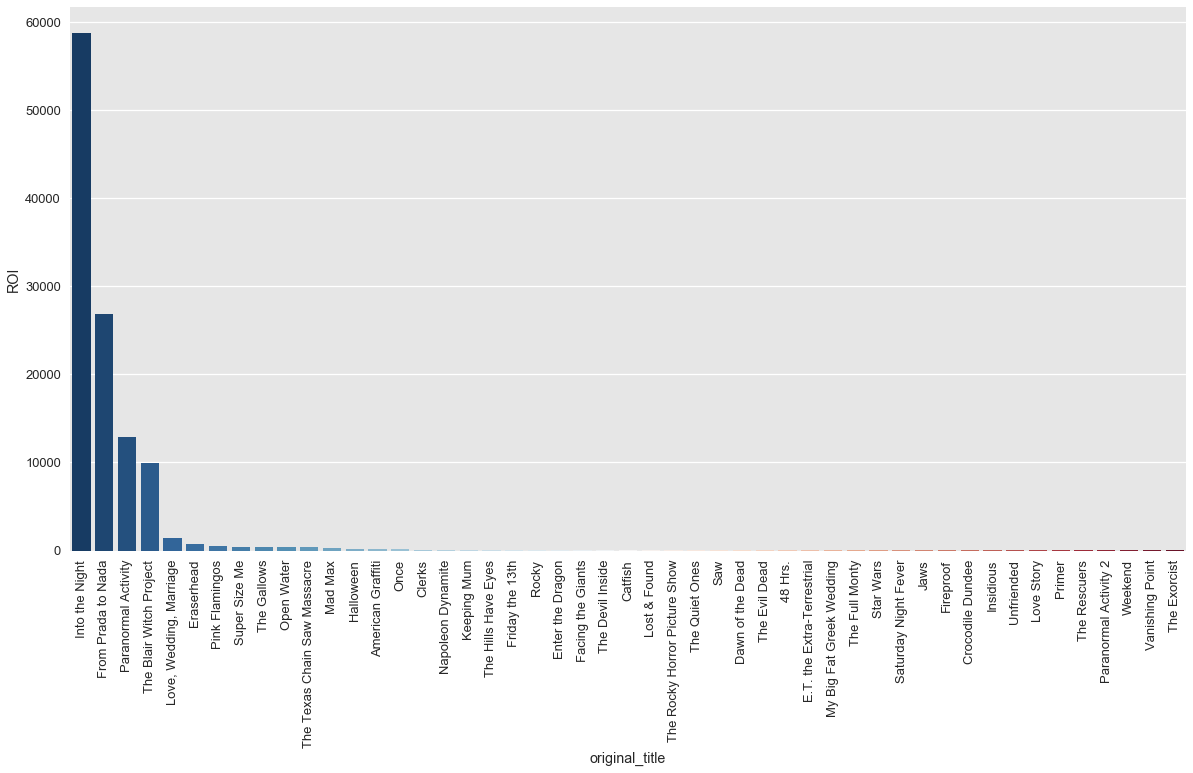

In [61]:
plt.figure(figsize=[20,10])
sns.barplot(data=movie_roi_cleaned.sort_values(by='ROI', ascending=False)[1:50], x='original_title', y='ROI', palette="RdBu_r")
plt.xticks(rotation=90)

For the rest of movies except 'The Karate Kid, Part II', 'Into the Night', 'From Prada to Nada', 'Paranormal Activity','The Blair Witch Project' have pretty high ROI compared with others.

### Research Question 5 (The correlation between features)


In [241]:
data_cleaned.head()

,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


#### combine single genre, single company with over 50 frequency and single keyword with over 100 frequency data frames into original data

In [73]:
data_dropped = data_cleaned.drop(['keywords', 'genres', 'production_companies', 'cast', 'id'], axis=1)
data_trans = pd.concat([data_dropped, genres_per_id, comp_per_id_over50, keyword_per_id_over100], axis=1)

In [107]:
data_trans.head()

,popularity,original_title,director,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,Action,...,new york,nudity,prison,revenge,sequel,sex,sport,suicide,suspense,woman director
0,32.985763,Jurassic World,Colin Trevorrow,124,5562,6.5,2015,1.379999e+08,1.392446e+09,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,28.419936,Mad Max: Fury Road,George Miller,120,6185,7.1,2015,1.379999e+08,3.481613e+08,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,13.112507,Insurgent,Robert Schwentke,119,2480,6.3,2015,1.012000e+08,2.716190e+08,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,5292,7.5,2015,1.839999e+08,1.902723e+09,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.335014,Furious 7,James Wan,137,2947,7.3,2015,1.747999e+08,1.385749e+09,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [81]:
data_corr = data_trans.corr()

In [106]:
data_corr.head()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,Action,Adventure,Animation,...,new york,nudity,prison,revenge,sequel,sex,sport,suicide,suspense,woman director
popularity,1.000000,0.164401,0.801427,0.244907,0.137012,0.497879,0.601623,0.146782,0.205443,0.063719,...,0.005805,-0.029747,0.006990,0.013595,0.049443,-0.022905,-0.036082,-0.011001,-0.029270,-0.059558
runtime,0.164401,1.000000,0.197071,0.203486,-0.128110,0.267006,0.211801,0.057174,0.052459,-0.293856,...,0.031518,-0.019075,0.030074,-0.006774,-0.020423,-0.014786,0.008893,0.022060,0.002627,-0.039073
vote_count,0.801427,0.197071,1.000000,0.288359,0.149766,0.576535,0.700351,0.167055,0.210302,0.053747,...,-0.004011,-0.035439,0.003089,0.002022,0.044252,-0.037392,-0.034215,-0.011526,-0.027209,-0.058225
vote_average,0.244907,0.203486,0.288359,1.000000,-0.124153,0.102811,0.218250,-0.095238,-0.008010,0.113219,...,0.001197,-0.048084,0.042544,-0.031170,-0.079358,-0.046237,0.003183,0.009271,-0.035250,-0.001856
release_year,0.137012,-0.128110,0.149766,-0.124153,1.000000,0.065556,-0.037997,-0.038107,-0.048071,0.066927,...,-0.017873,-0.035658,-0.045812,0.016869,0.040483,-0.004551,-0.003208,0.003039,-0.037693,0.116183


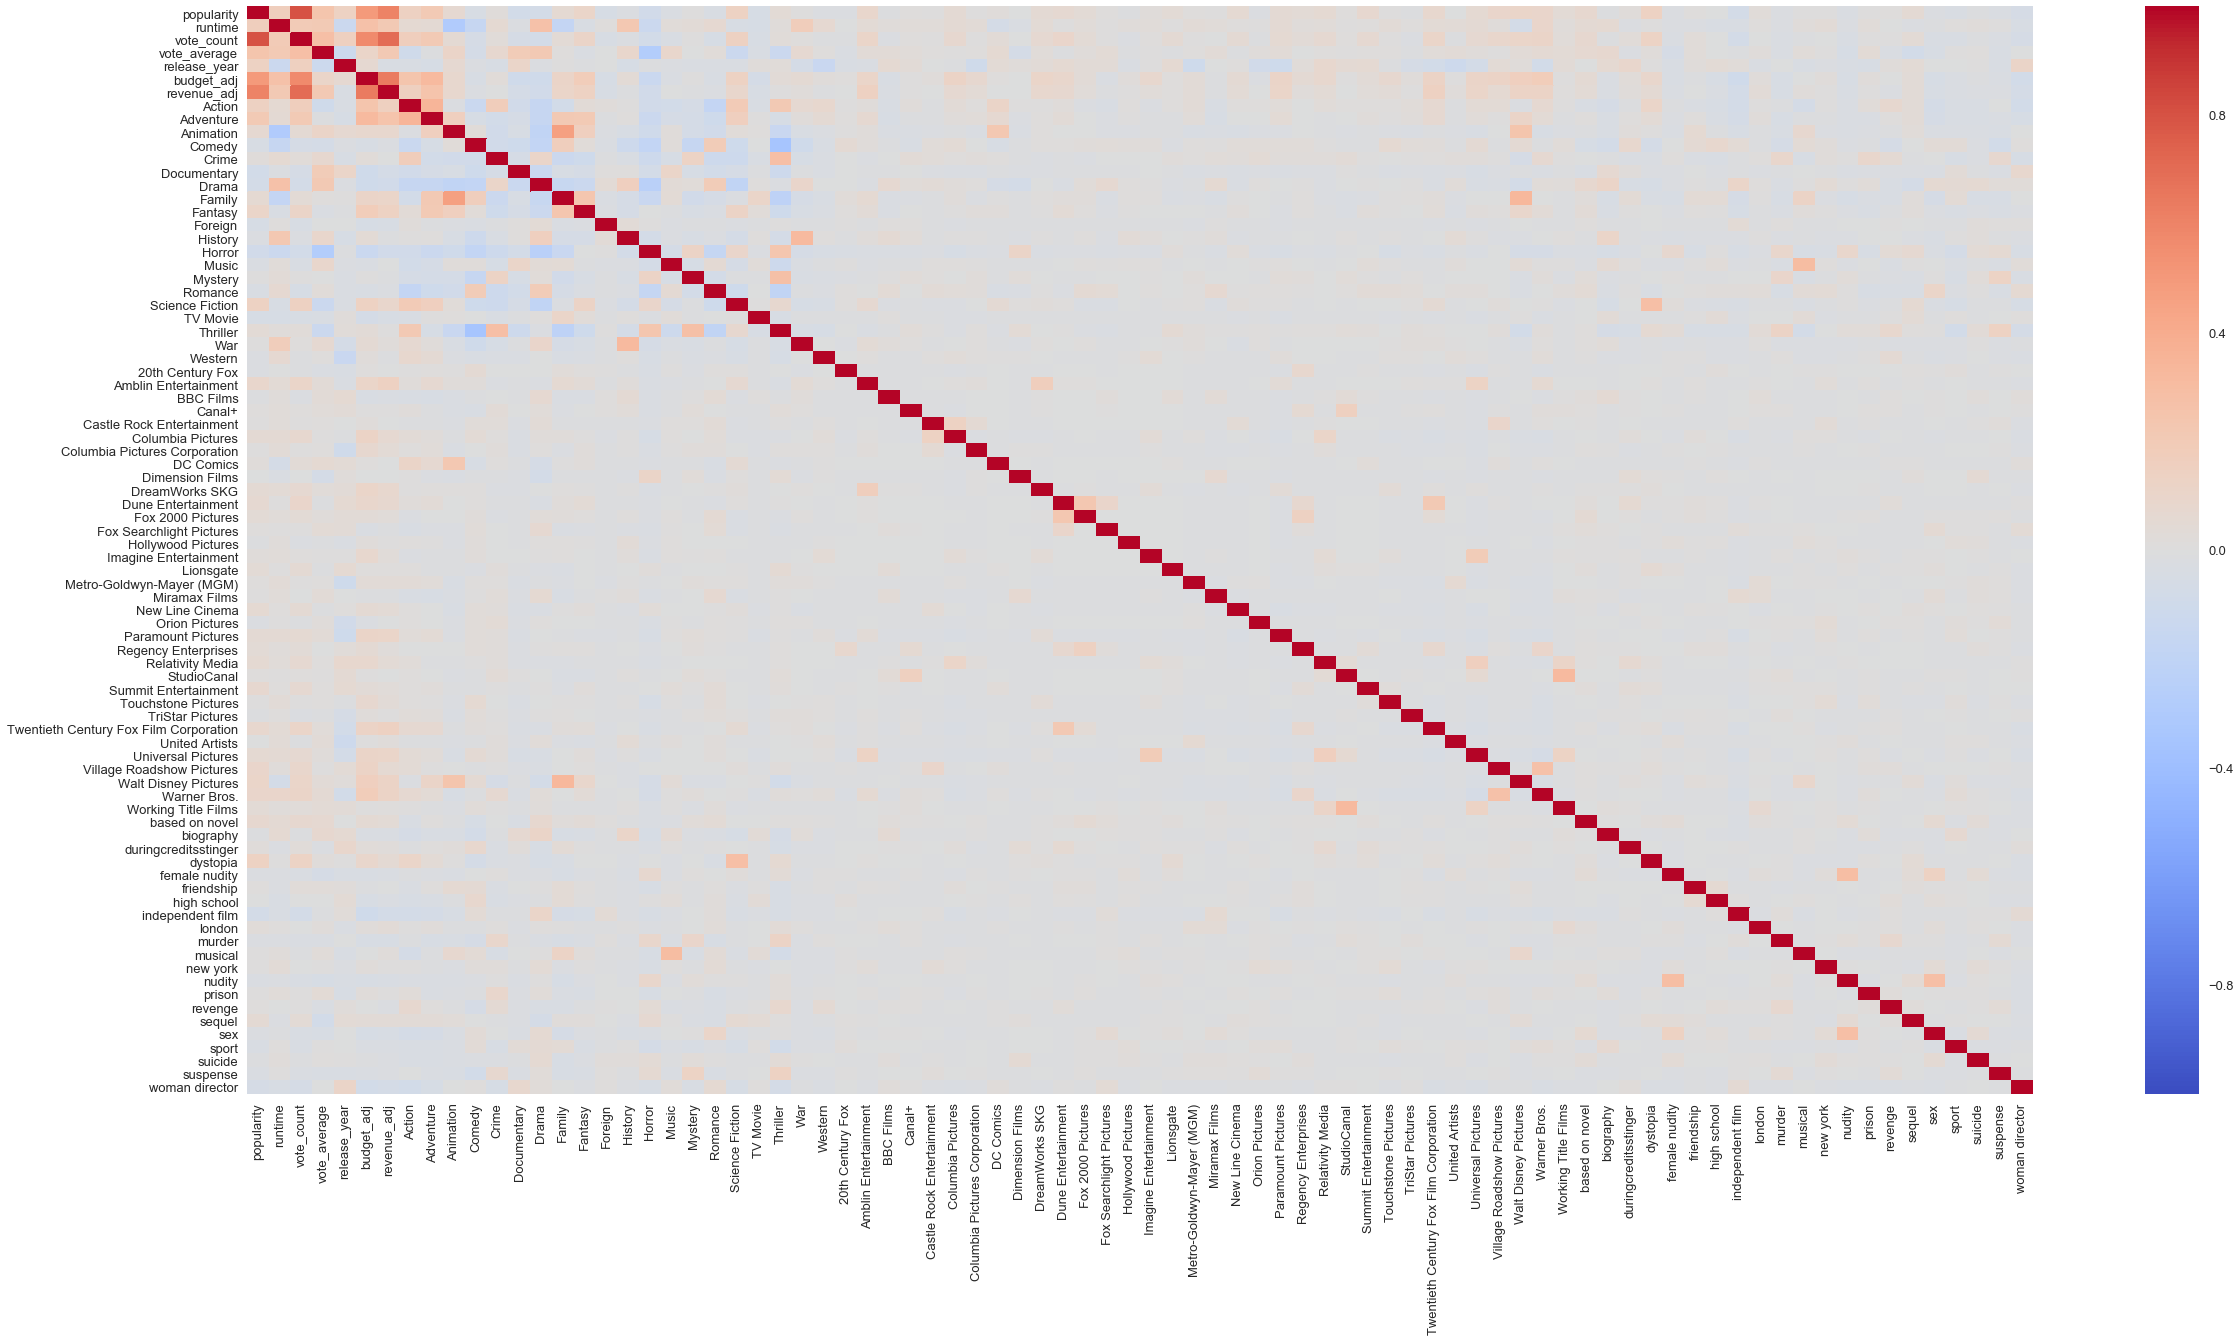

In [100]:
plt.figure(figsize=[40,20])
sns.heatmap(data_corr, 
        xticklabels=data_corr.columns,
        yticklabels=data_corr.columns, cmap="coolwarm", vmin=-1, vmax=1)

It is hard to see what is going on, but it seems correlations concentrate on the left corner, so plot the first 30 features

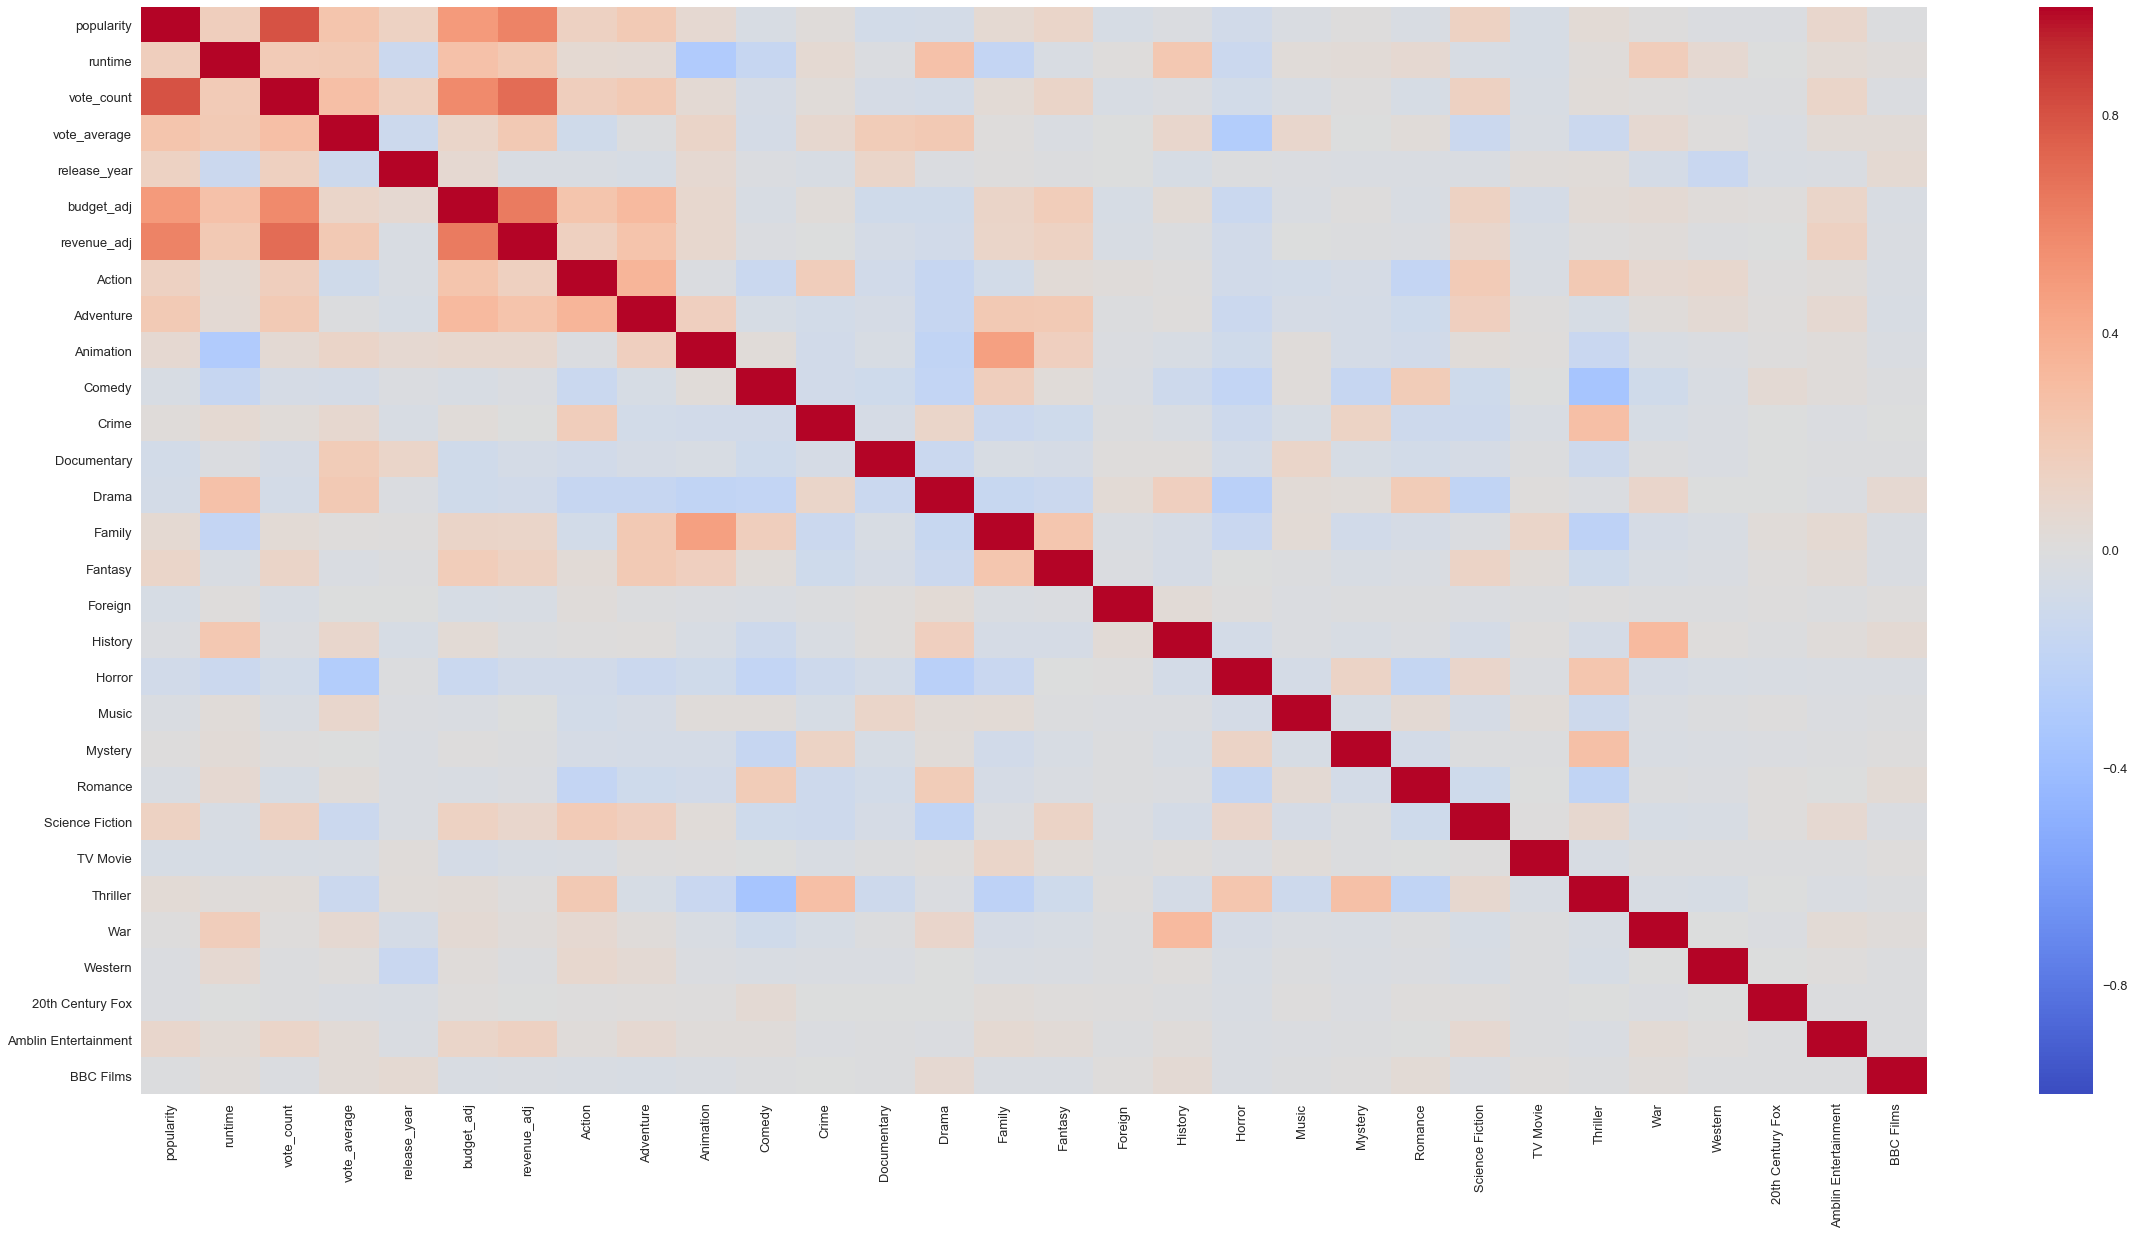

In [103]:
plt.figure(figsize=[40,20])
sns.heatmap(data_corr.iloc[0:30, 0:30], 
        xticklabels=data_corr.iloc[0:30, 0:30].columns,
        yticklabels=data_corr.iloc[0:30, 0:30].columns, cmap="coolwarm", vmin=-1, vmax=1)

from the correlation plot,
1. for popularity, vote_count, budget_adj, revenue_adj have positive correlation with it.
2. for runtime, genre Animation, Comedy and family seem to have negative correlation with it.
3. for vote_count, revenue_adj and budget_adj have relatively high positive correlation.
4. for vote_average, genre Horror has negative correlation.
5. for budget_adj, revenue_adj has high correlation with it.


<a id='conclusions'></a>
## Conclusions

1. Drame, Comedy, Thriller and Action are four most-made genres. The number of drama is the most.
2. Drama is the most popular genre, following by action, comedy and thriller.
3. Action, Adventure, Drama, Comedy and Thriller are the most profitable genres.
4. Documentary and Music have highest ROI with all others having fairly close ROI
5. Warner Bros, Universal Pictures, Paramount Pictures and Twentieth Century Fox Film Coportion have highest revenue with Warner Bros highest
6. 'independent film', 'woman director', 'based on novel' and 'sex' are the most popular key words
7. 'Jurassic World', 'Mad Max: Fury Road', 'Interstellar' are the most popular movies and way more than others
8. 'Avatar', 'Star Wars' and 'Titanic' produce the most revenue
9. 'The Karate Kid, Part II' has so much higher ROI than others which is over 1.1 million. For the rest of movies except 'The Karate Kid, Part II', 'Into the Night', 'From Prada to Nada', 'Paranormal Activity','The Blair Witch Project' have pretty high ROI compared with others.

from the correlation plot,
1. for popularity, vote_count, budget_adj, revenue_adj have positive correlation with it
2. for runtime, genre Animation, Comedy and family seem to have negative correlation with it
3. for vote_count, revenue_adj and budget_adj have relatively high positive correlation
4. for vote_average, genre Horror has negative correlation
5. for budget_adj, revenue_adj has high correlation with it

